In [2]:
import keras
import tensorflow as tf
import numpy as np

np.set_printoptions(suppress=True)

2024-02-12 14:42:18.350200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 14:42:18.350259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 14:42:18.351983: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 14:42:18.359682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-12 14:42:19.342294: W tensorflow/compiler/tf2

In [3]:
class ClampConstraint(tf.keras.constraints.Constraint):
    pass

model = keras.models.load_model('../models/rq-mse-256-clipped-0.496.keras', custom_objects={'ClampConstraint': ClampConstraint})
model.summary()

2024-02-12 14:42:20.547044: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 12, 1)             0         
 )                                                               
                                                                 
 tf.bitwise.bitwise_and (TF  (None, 12, 64)            0         
 OpLambda)                                                       
                                                                 
 tf.math.not_equal (TFOpLam  (None, 12, 64)            0         
 bda)                                                            
                                                                 
 tf.cast (TFOpLambda)        (None, 12, 64)            0         
                                                             

2024-02-12 14:42:20.589635: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:42:20.589954: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:42:20.592144: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:42:20.592211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:42:20.592245: I external/local_xla/xla/stream_executor

In [4]:
w1 = model.layers[6].weights[0].numpy() # / 0.015625

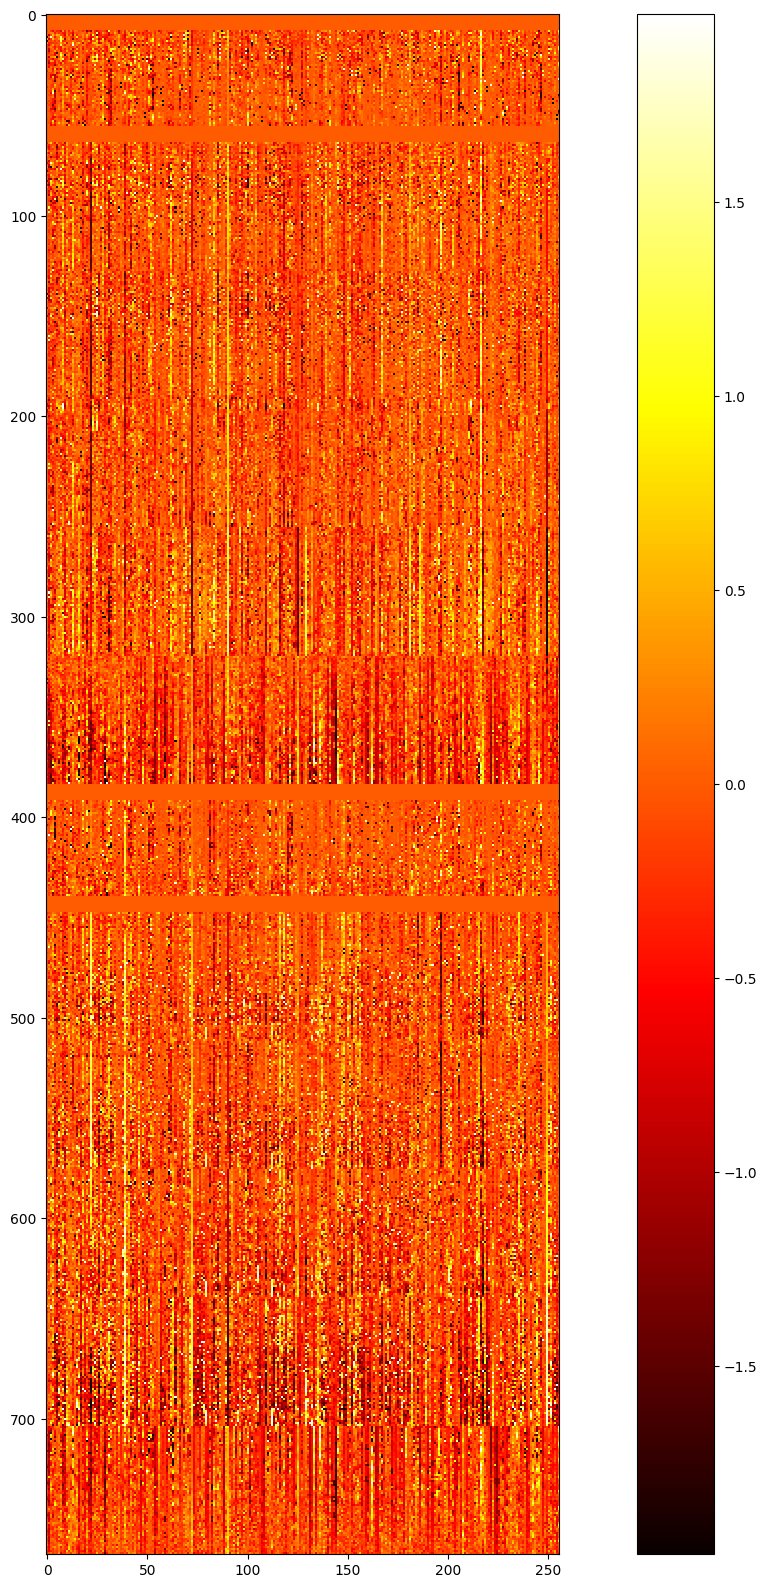

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(w1, cmap='hot', interpolation='nearest')
plt.gcf().set_size_inches(20, 20)
plt.colorbar()
plt.show()

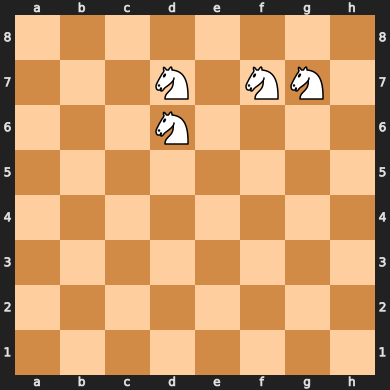

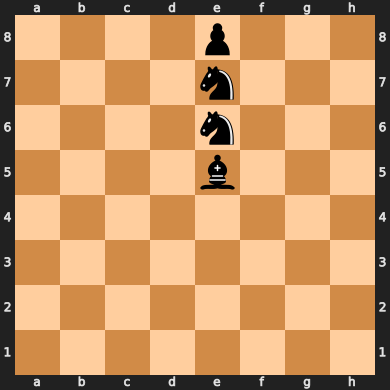

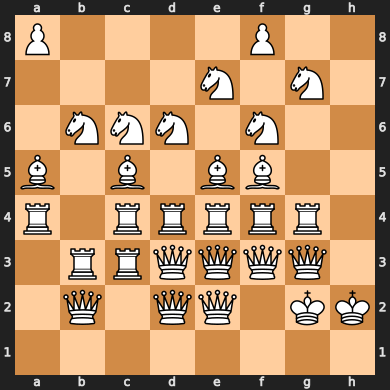

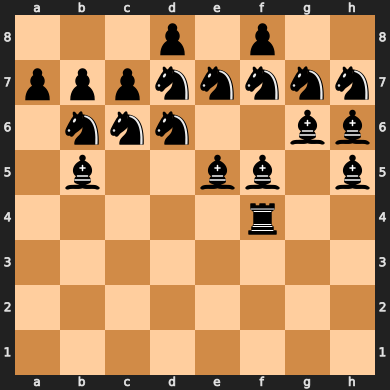

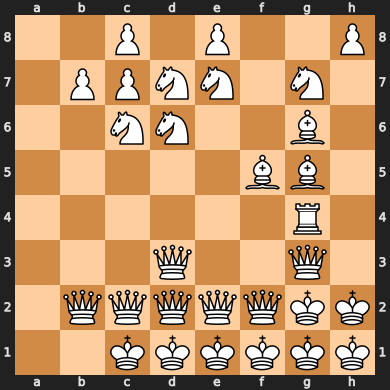

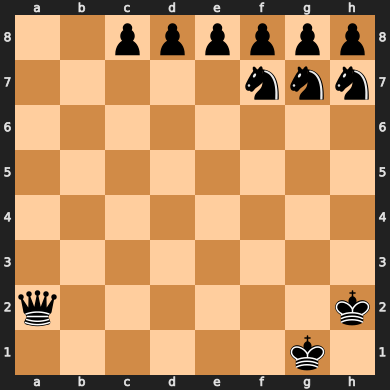

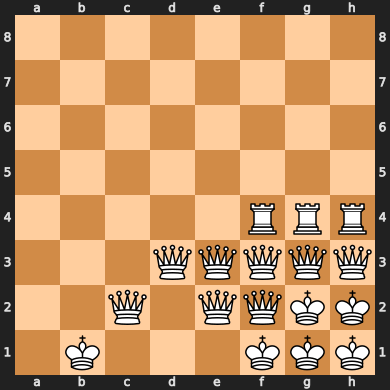

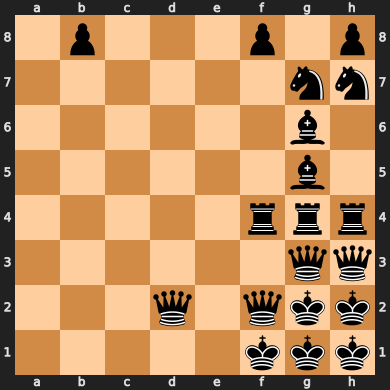

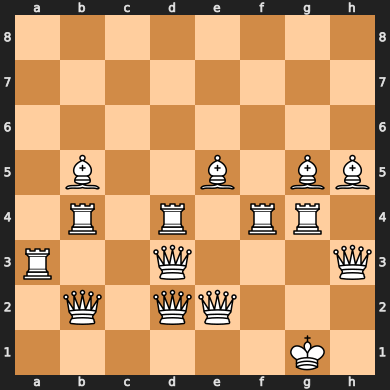

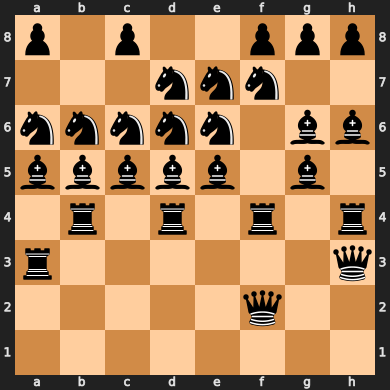

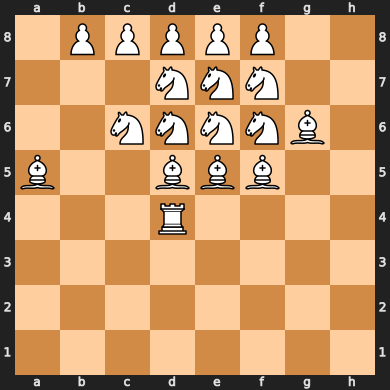

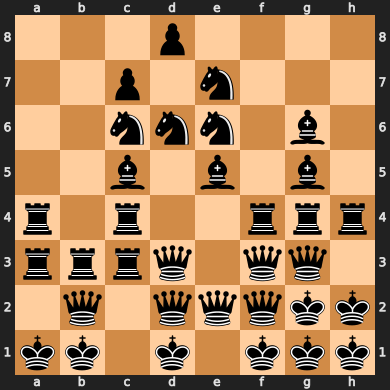

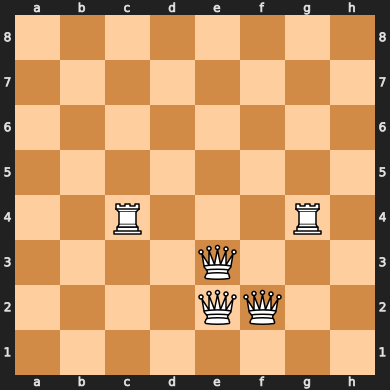

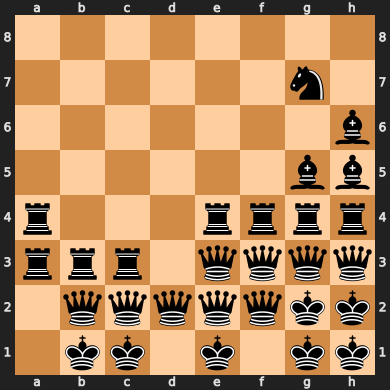

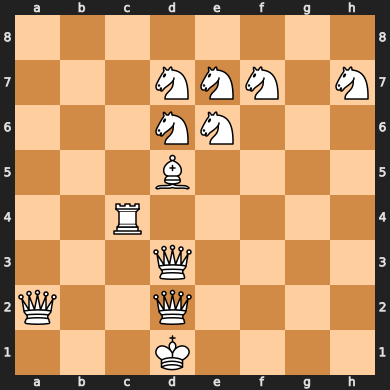

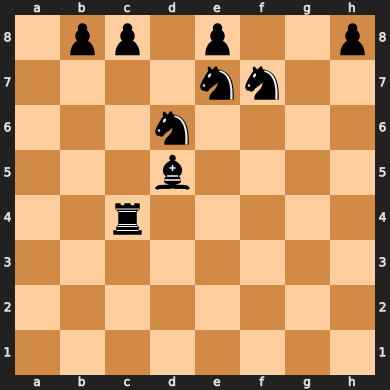

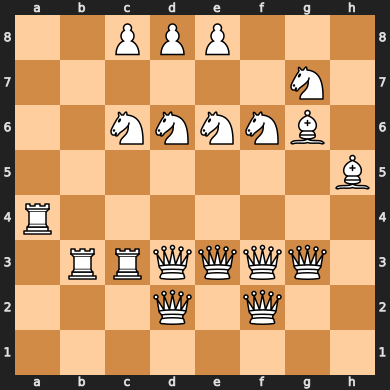

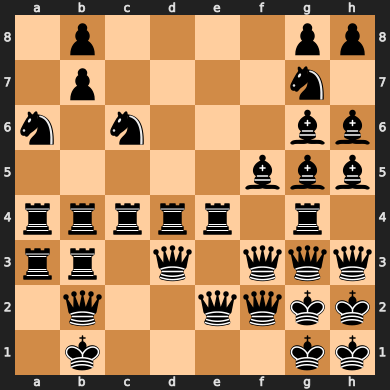

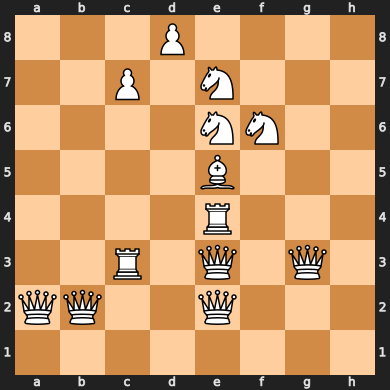

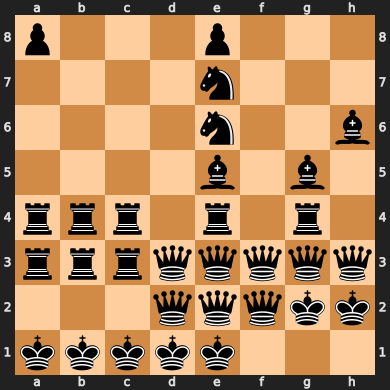

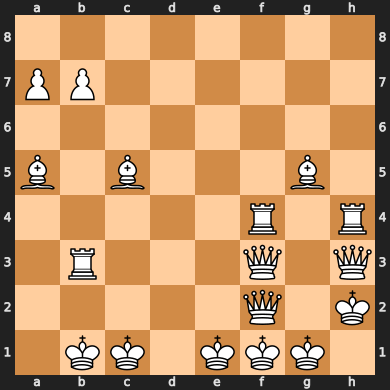

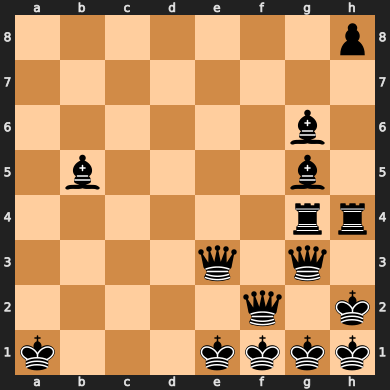

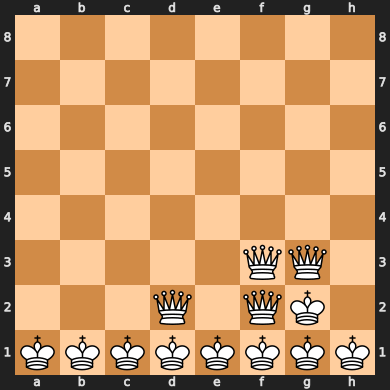

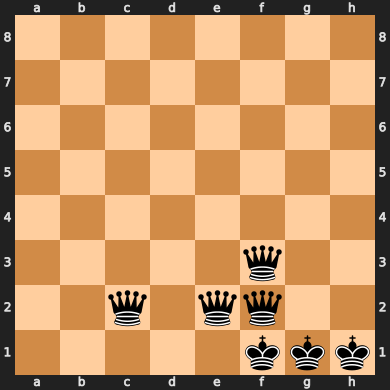

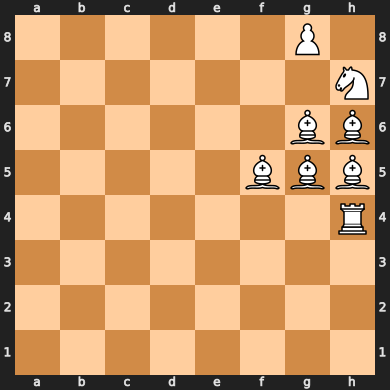

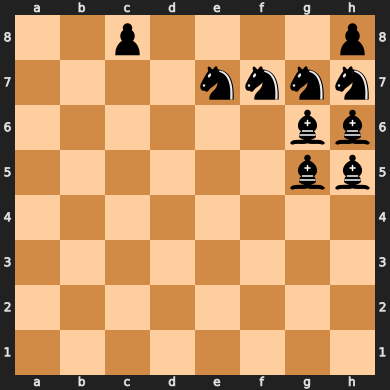

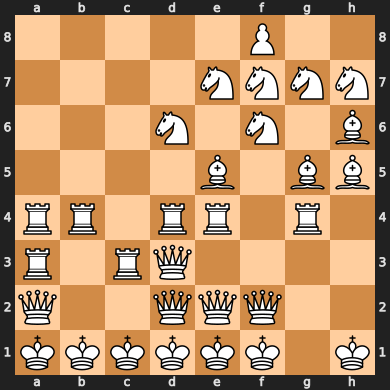

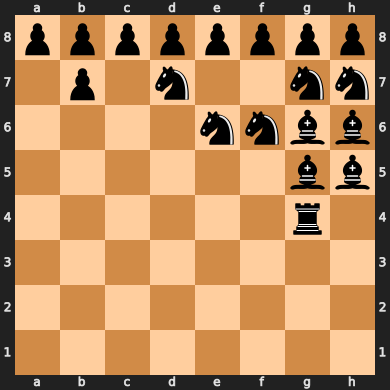

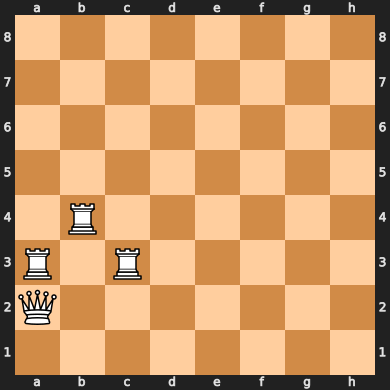

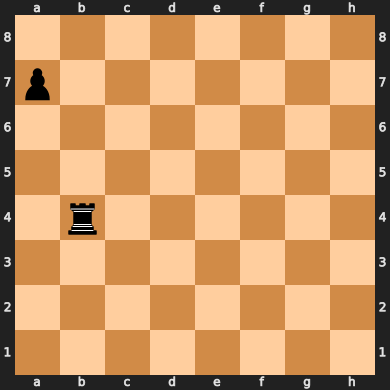

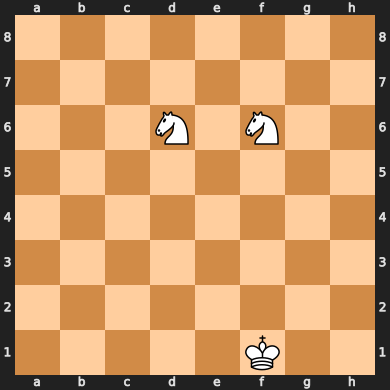

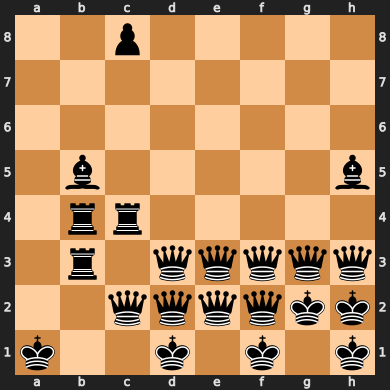

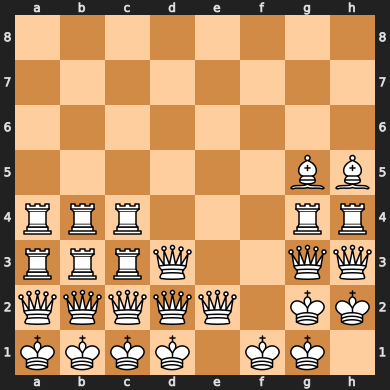

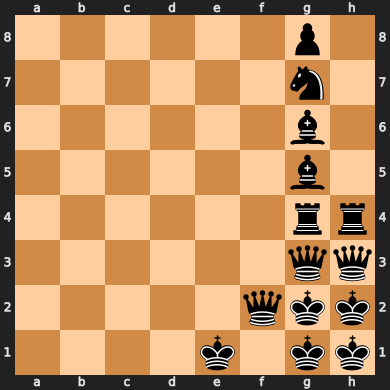

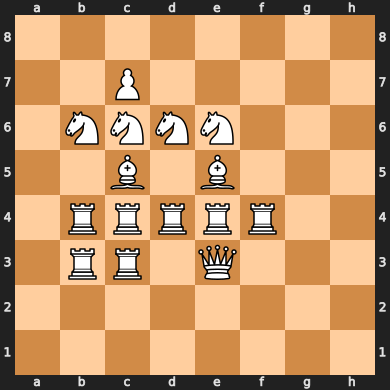

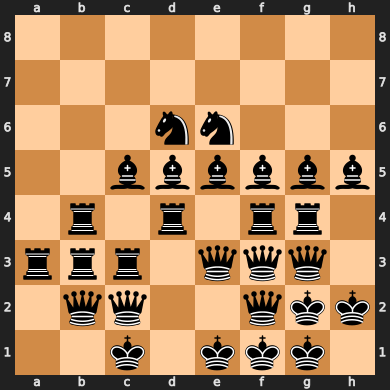

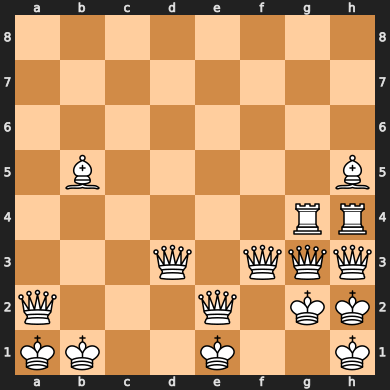

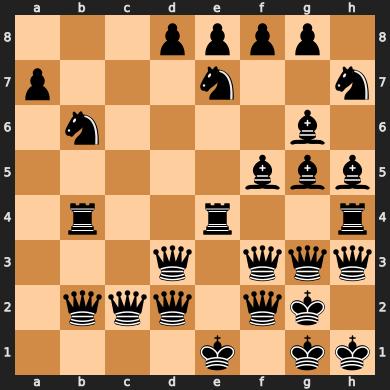

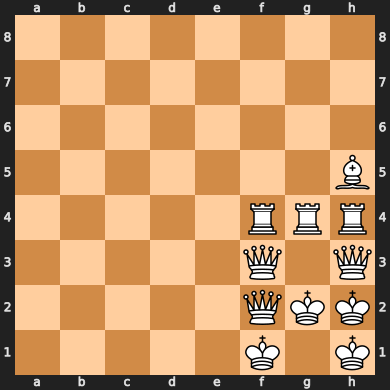

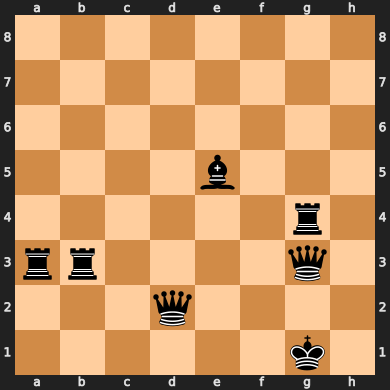

In [18]:
import chess

for k in range(0,20):
    w1_0 = w1[:, k]
    tx = np.abs(w1_0) > 1

    indexes, = np.where(tx)


    bB = chess.Board()
    bB.clear()
    bW = chess.Board()
    bW.clear()
    for idx in indexes:
        color = chess.WHITE if idx < 64*6 else chess.BLACK
        square = idx % 64
        file = square % 8
        rank = 7 - (square // 8)
        plane = (idx % 64*6) // 64
        piece_type = -1
        if plane == 0:
            piece_type = chess.PAWN
        elif plane == 1:
            piece_type = chess.KNIGHT
        elif plane == 2:
            piece_type = chess.BISHOP
        elif plane == 3:
            piece_type = chess.ROOK
        elif plane == 4:
            piece_type = chess.QUEEN
        elif plane == 5:
            piece_type = chess.KING

        if color == chess.WHITE:
            bW.set_piece_at(chess.Square(rank * 8 + file), chess.Piece(piece_type, color))
        else:
            bB.set_piece_at(chess.Square(rank * 8 + file), chess.Piece(piece_type, color))

    # index w_0 by indexes
    display(bW)
    display(bB)
    #indexes, w1_0[indexes]